In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import bs4 as bs
import pickle
import requests
from multiprocessing import Pool, cpu_count
import matplotlib.pyplot as plt
%matplotlib inline
from collections import defaultdict

import quandl

In [2]:
def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
        
    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)
        
    return tickers

tickers = save_sp500_tickers()

In [3]:
def getTable(ticker):
    return quandl.get_table('SMA/TWTD', brand_ticker=ticker, paginate = True)

quandl.ApiConfig.api_key = 'carEM6X2Doc2HZ1GzWsQ'
pool = Pool(cpu_count() * 2)
tickerList = pool.map(getTable, tickers)

In [4]:
df = pd.concat(frame for frame in tickerList)

In [18]:
df.reset_index(drop = True, inplace = True)

In [21]:
df.head()

,brand_ticker,twt_screen_name,brand_name,sector,geography,date,followers_count,followees_count,tweets_count,retweets_count,replies_count,favorites_count,total_tweets_count,brand_proactive_count,brand_replies_count,brand_retweets_count,average_reply_time,engagement_score
0,MMM,3M_Automotriz,3M Automotriz Vzla,Automotive,Venezuela,2015-02-16,3525,1776,1,0,0,0,4664,1,0,0,0,0
1,MMM,3M_Automotriz,3M Automotriz Vzla,Automotive,Venezuela,2015-02-17,3527,1776,1,0,0,0,4665,1,0,0,0,0
2,MMM,3M_Automotriz,3M Automotriz Vzla,Automotive,Venezuela,2015-02-18,3527,1776,4,0,0,0,4667,4,0,0,0,0
3,MMM,3M_Automotriz,3M Automotriz Vzla,Automotive,Venezuela,2015-02-19,3529,1776,3,0,0,0,4670,3,0,0,0,0
4,MMM,3M_Automotriz,3M Automotriz Vzla,Automotive,Venezuela,2015-02-20,3530,1776,3,3,0,0,4673,3,0,0,0,135


In [19]:
df.to_csv('SMATWTD.csv')

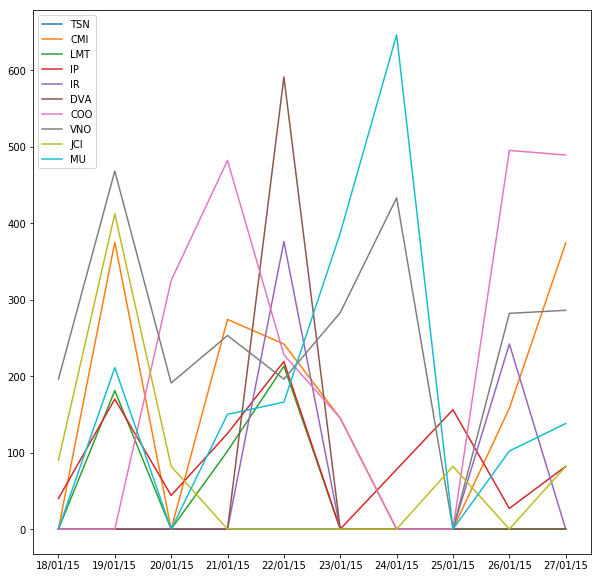

In [131]:
#corr = df.corr()
#plt.matshow(corr)
# randomly sample 10%
# aggregate monthly engagement then plot against stock price
import random
import datetime

randomList = list(np.random.choice(tickers, 10))
size = len(df.index)
randomInt = random.randint(0,size)

randomDate = df.iloc[randomInt,5].date()

allDatesTickers  = df[(df['date'] == df.iloc[randomInt, 5]) & (df['brand_ticker'].isin(randomList))].filter(items=['brand_ticker', 'date', 'engagement_score'])

engagementList = [[df.iloc[index + i, 17] for i in range(10)] for index in allDatesTickers.index.values]

togetherList = list(zip(randomList, engagementList))

#print(engagementList)
#meanEngagementList = [np.mean([df.iloc[index + i, 17] for i in range(10)]) for index in allDatesTickers.index.values]
#print(meanEngagementList)

dates = [(randomDate + datetime.timedelta(days = i)).strftime('%d/%m/%y') for i in range(10)]

plt.figure(figsize=(10,10))
for label, engagementScore in togetherList:
    plt.plot(dates, engagementScore, label = label)

plt.legend()

In [132]:
prices = pd.read_csv("daily_sentiment_price2.csv")

In [133]:
prices.head()

,Unnamed: 0,ticker,exchange_cd,date,sentiment,sentiment_high,sentiment_low,news_volume,news_buzz,name,...,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume,percentage_week_change,sentiment_sign
0,17036,A,US,2013-01-02,1.000,1.000,1.000,1,5.0,AGILENT TECHNOLOGIES INC,...,6287700.0,0.0,1.0,29.054711,29.054711,28.351942,28.854904,6287700.0,0.034859,1
1,17037,A,US,2013-01-03,0.000,0.000,0.000,0,0.0,AGILENT TECHNOLOGIES INC,...,4114300.0,0.0,1.0,28.896244,29.034042,28.648276,28.958253,4114300.0,0.000000,0
2,17038,A,US,2013-01-04,0.000,0.000,0.000,0,0.0,AGILENT TECHNOLOGIES INC,...,4601500.0,0.0,1.0,29.034042,29.592124,28.841124,29.530115,4601500.0,0.000000,0
3,17039,A,US,2013-01-07,3.000,4.633,1.367,3,10.0,AGILENT TECHNOLOGIES INC,...,2567600.0,0.0,1.0,29.350977,29.488775,29.199399,29.316528,2567600.0,0.011033,1
4,17040,A,US,2013-01-08,-1.333,2.024,-3.690,3,10.0,AGILENT TECHNOLOGIES INC,...,2787500.0,0.0,1.0,29.261408,29.474995,29.006482,29.082271,2787500.0,0.016011,1


,ticker,date,open
